In [1]:
import tensorflow as tf
from tensorflow.keras.applications import VGG19
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
# Define the input shape for the VGG19 model
input_shape = (224, 224, 3)

# Create an instance of the VGG19 model with pre-trained weights
base_model = VGG19(weights='imagenet', include_top=False, input_shape=input_shape)

In [3]:
# Freeze the pre-trained layers so they are not trainable
for layer in base_model.layers:
    layer.trainable = False

In [4]:
# Create a new model on top of the pre-trained base model
model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')  # Set the number of output classes
])

In [5]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [6]:
# Preprocess the data and create data generators
datagen = ImageDataGenerator(rescale=1./255)

In [7]:
random_state_global = 42
epoch_val = 1000
batch_size_val = 32
threshold_val = 1e-4
IMG_SIZE = (224, 224)
normalization_layer = tf.keras.layers.Rescaling(1./255)

# Define the paths for train and test data
train_dir =  'chest_xray/train'
test_dir =  'chest_xray/test'
val_dir =  'chest_xray/val'

# Preprocess the data
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)


In [8]:
# Split the training data into train and validation sets
train_generator = tf.keras.utils.image_dataset_from_directory(train_dir,
                                                        label_mode="categorical",
                                                        image_size=IMG_SIZE,
                                                        seed=random_state_global,
                                                        batch_size = batch_size_val,
                                                        shuffle=True)

train_ds = train_generator.map(lambda x, y: (normalization_layer(x), y))
print(train_ds)

test_generator = tf.keras.utils.image_dataset_from_directory(test_dir,
                                                        label_mode="categorical",
                                                        image_size=IMG_SIZE,
                                                        seed=random_state_global,
                                                        batch_size = batch_size_val,
                                                        shuffle=False) # don't shuffle test data for prediction analysis
validation_generator = tf.keras.utils.image_dataset_from_directory(val_dir,
                                                        label_mode="categorical",
                                                        image_size=IMG_SIZE,
                                                        seed=random_state_global,
                                                        batch_size = batch_size_val,
                                                        shuffle=False) # don't shuffle valid data for prediction analysis

class_names = validation_generator.class_names
print(f'\nclass names are {class_names}')

Found 5102 files belonging to 2 classes.
Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089
<MapDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 2), dtype=tf.float32, name=None))>
Found 624 files belonging to 2 classes.
Found 130 files belonging to 2 classes.

class names are ['NORMAL', 'PNEUMONIA']


In [9]:
# my callbacks
my_callbacks = [
            tf.keras.callbacks.EarlyStopping(monitor='loss', patience=1, min_delta=1e-4,mode="min",restore_best_weights=False,verbose=1)]
# Train the model
history_1 = model.fit(train_ds,
                        epochs=epoch_val,
                        validation_data=validation_generator,
                        callbacks = my_callbacks,
                        verbose=0)

Epoch 13: early stopping


In [12]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(test_generator)
print(f"Test loss: {loss}")
print(f"Test accuracy: {accuracy}")


20/20 [==============================] - 96s 5s/step - loss: 40.3615 - accuracy: 0.7644
Test loss: 40.36150360107422
Test accuracy: 0.7644230723381042


NameError: name 'valid_generator' is not defined

In [13]:
val_loss, val_accuracy = model.evaluate(validation_generator ,  batch_size=None, verbose="auto", callbacks=None)
print(val_loss)
print(val_accuracy)


5/5 [==============================] - 17s 3s/step - loss: 37.6489 - accuracy: 0.7231
37.64889144897461
0.7230769395828247


20/20 [==============================] - 96s 5s/step
[1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

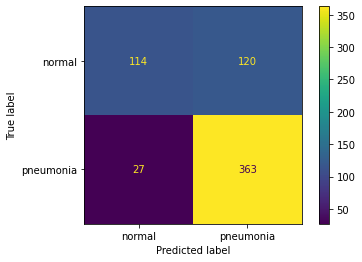

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay
y_pred_test = model.predict(test_generator) 

y_pred_test = [np.argmax(class_) for class_ in y_pred_test]
print(y_pred_test) 
# x is the images , y is the class labels,that are in batches .
y_actual = [] 
flag = False 
for x , y in test_generator :
    if flag == False : 
       flag = True 
       sample_pic = x[1] 
    for vec in y :  
        y_actual.append(np.argmax(vec)) 

print(y_actual)
    
l = ["normal", "pneumonia"]
cf_mat = confusion_matrix(y_actual, y_pred_test)
cf_display = ConfusionMatrixDisplay(confusion_matrix = cf_mat , display_labels=l)
cf_display.plot() 
plt.show()

In [16]:
import numpy as np
from sklearn.metrics import precision_score, recall_score

# Calculate precision and recall
precision = precision_score(y_actual, y_pred_test, average='weighted')
recall = recall_score(y_actual, y_pred_test, average='weighted')

print("Precision:", precision)
print("Recall:", recall)


Precision: 0.772911986256112
Recall: 0.7644230769230769


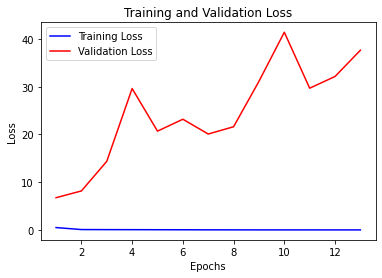

In [17]:
train_loss = history_1.history['loss']
val_loss = history_1.history['val_loss']

import matplotlib.pyplot as plt

epochs = range(1, len(train_loss) + 1)

plt.plot(epochs, train_loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()